In [ ]:
import pandas as pd
import numpy as np
import os
import librosa, librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display, HTML

In [37]:
selected_tones = ["mā", "má", "mǎ", "mà"]

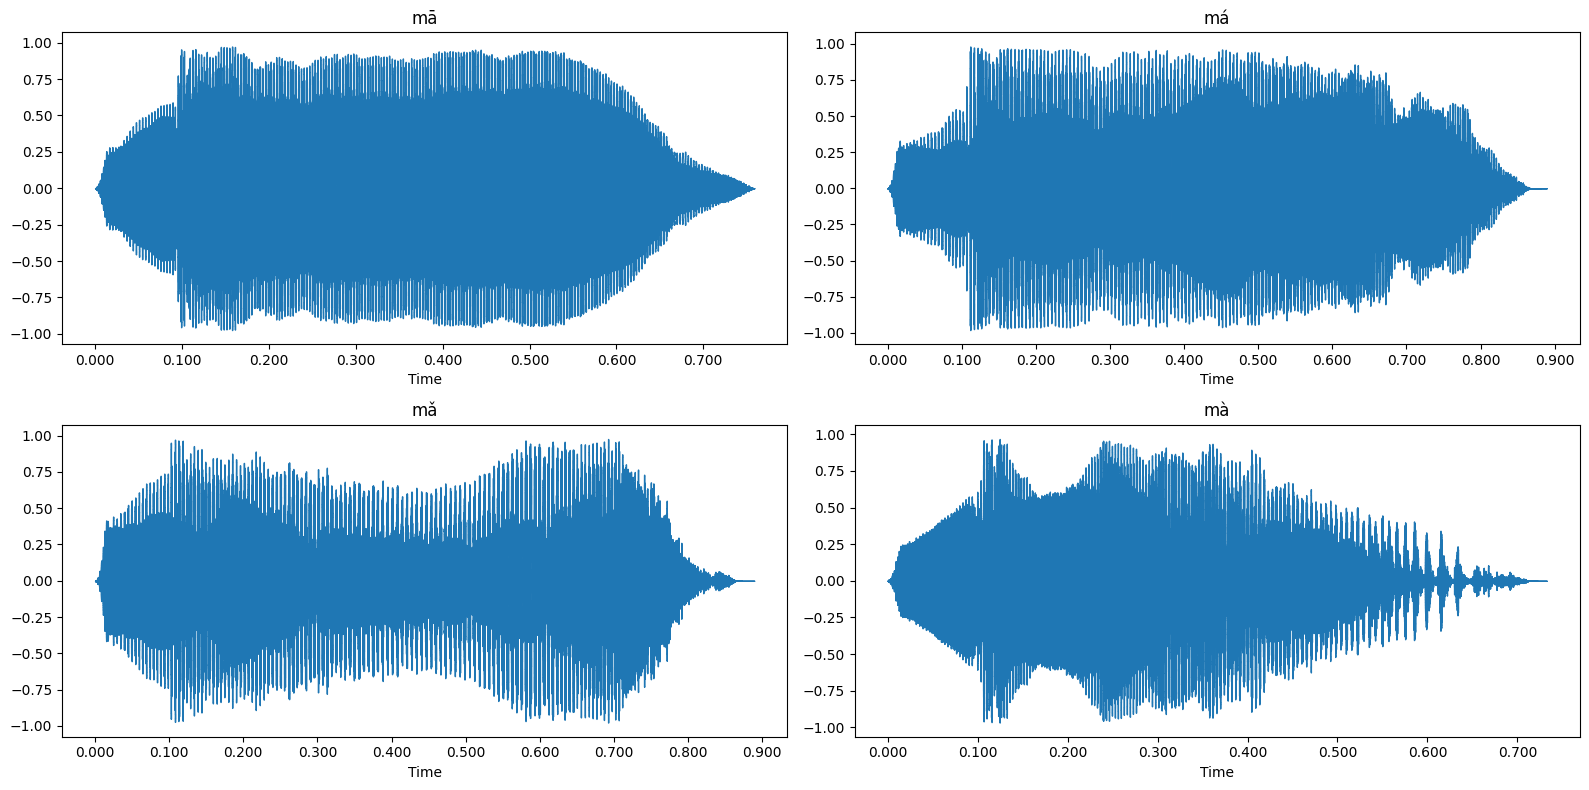

In [38]:
def show_wave(path, ax, title=""):
    audio, sr = librosa.load(path, sr=None)
    librosa.display.waveshow(audio, sr=sr, ax=ax)
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

for i in range(4):
    show_wave(f"../examples/ma{i+1}.wav", axes[i // 2][ i % 2], title=selected_tones[i])

plt.tight_layout()
plt.show()

In [42]:
for i in range(4):
    display(HTML(f"<h3>{selected_tones[i]}</h3>"))
    display(Audio(f"../examples/ma{i+1}.wav", rate=None))

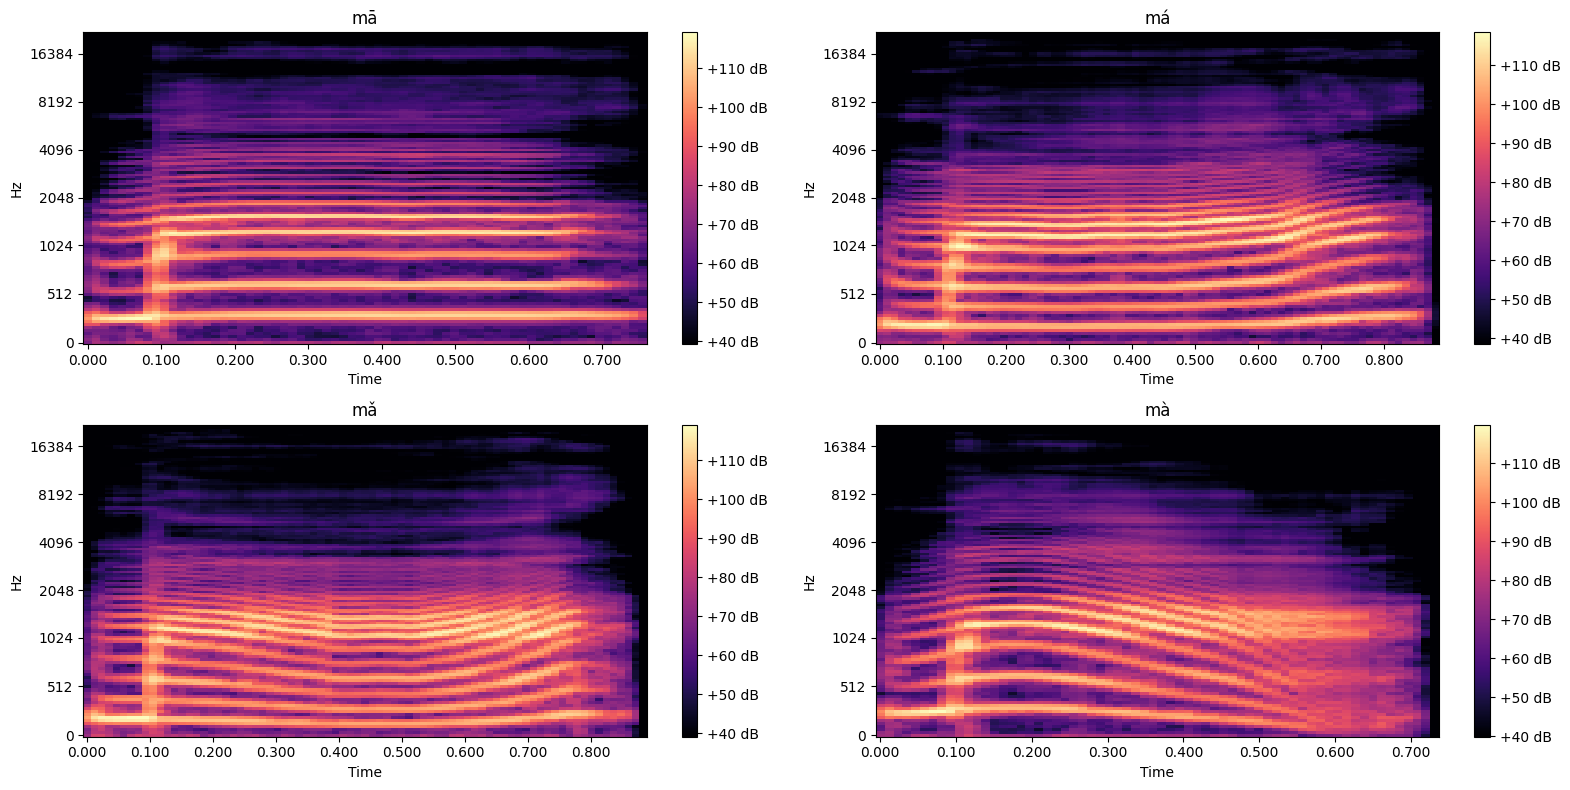

In [40]:
def show_mel_spectrogram(path, ax, title=""):
    audio, sr = librosa.load(path, sr=None)
    S = librosa.stft(audio)
    sgram_mag, _ = librosa.magphase(S)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    img = librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel', ax=ax)
    plt.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

for i in range(4):
    show_mel_spectrogram(f"../examples/ma{i+1}.wav", axes[i // 2][ i % 2], title=selected_tones[i])

plt.tight_layout()
plt.show()